In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [11]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

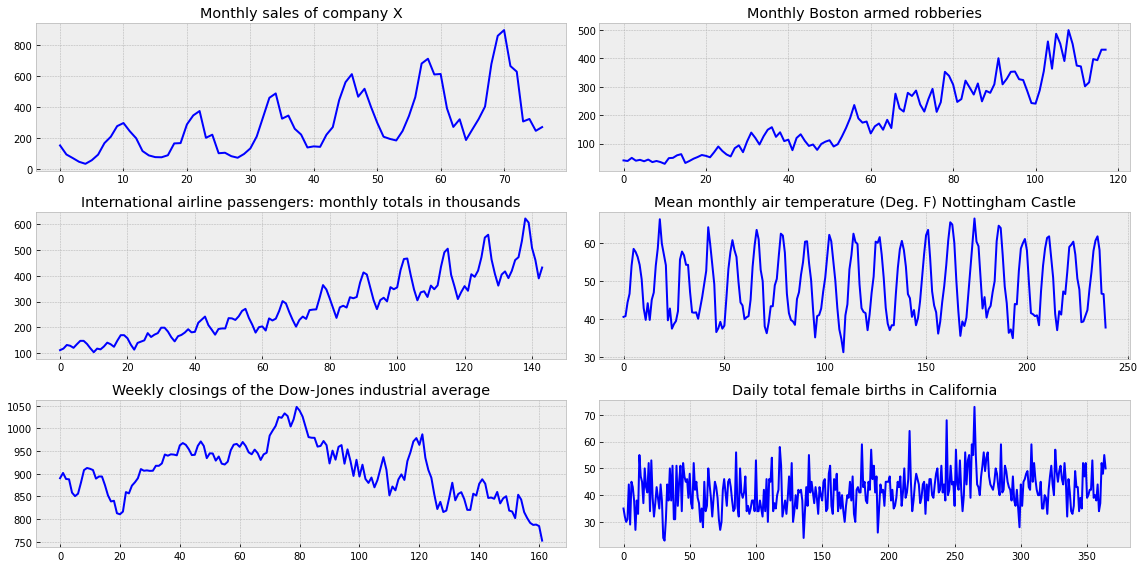

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [32]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [80]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', title=''):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

MONTHLY SALES OF COMPANY X

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

-----------------------------------------
MONTHLY BOSTON ARMED ROBBERIES

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

-----------------------------------------
INTERNATIONAL AIRLINE PASSENGERS: MONTHLY TOTALS IN THOUSANDS

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#La

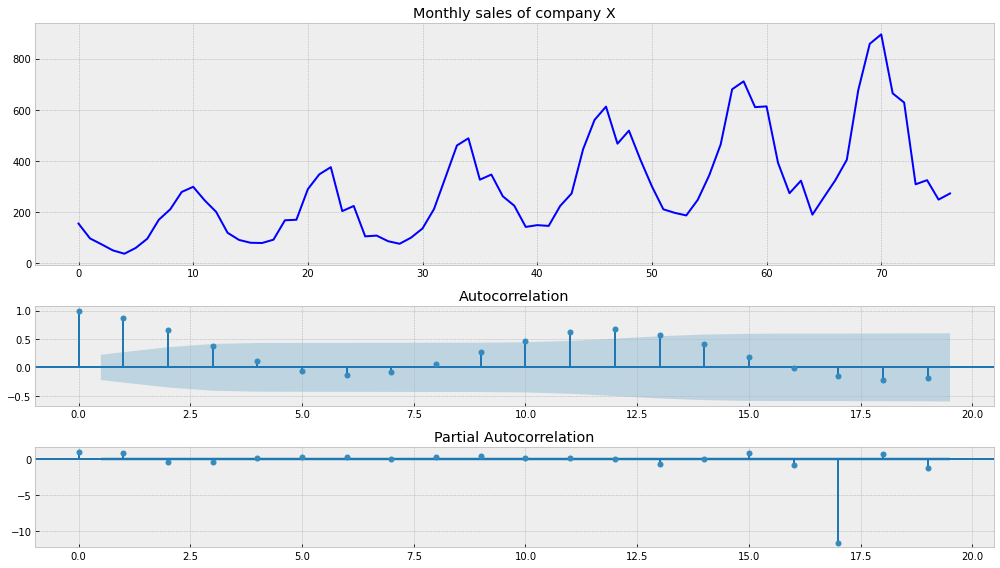

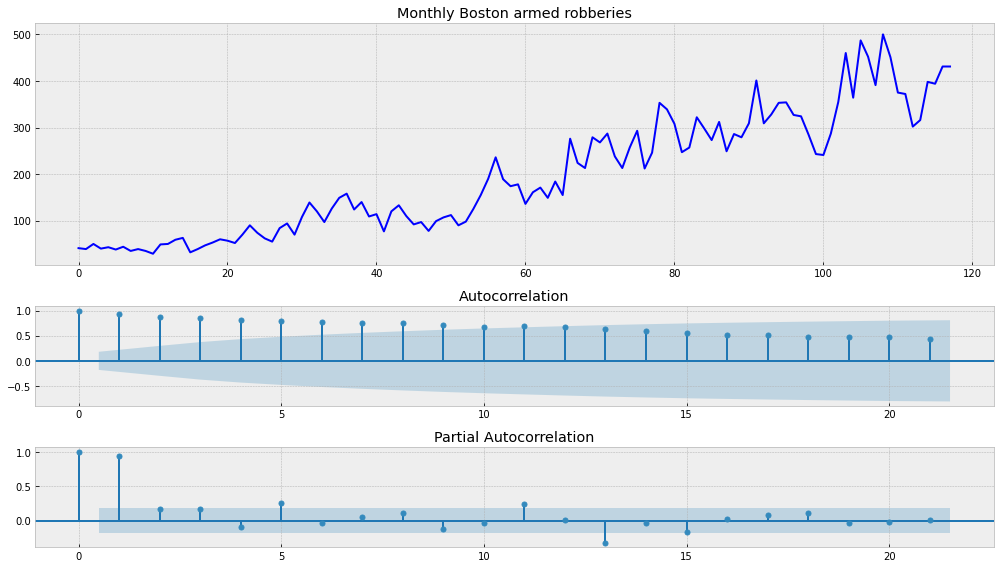

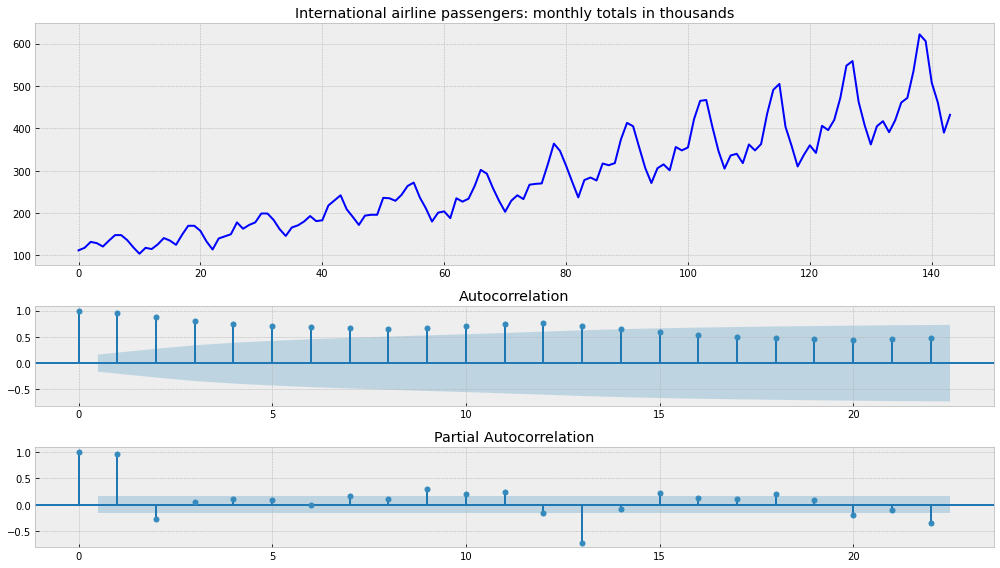

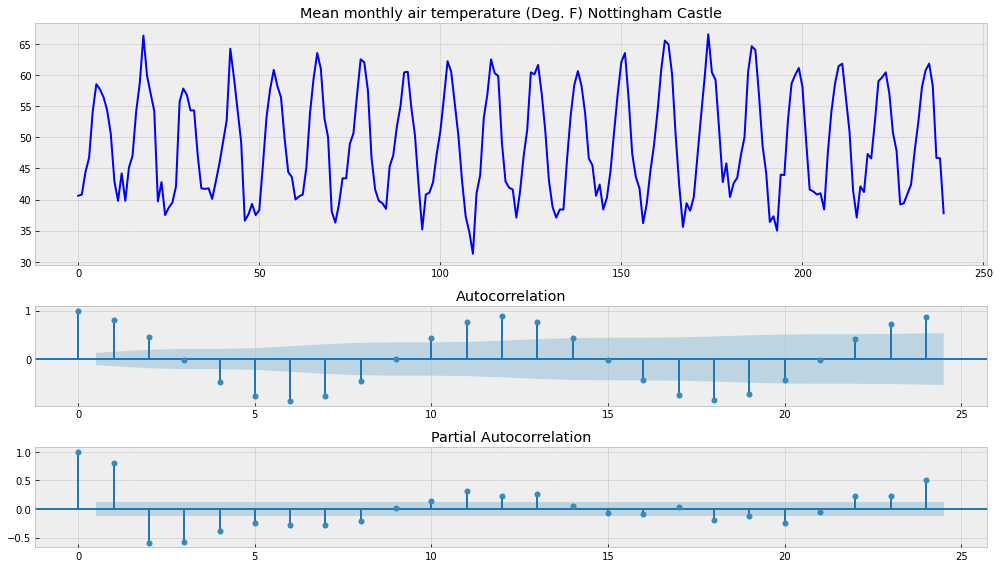

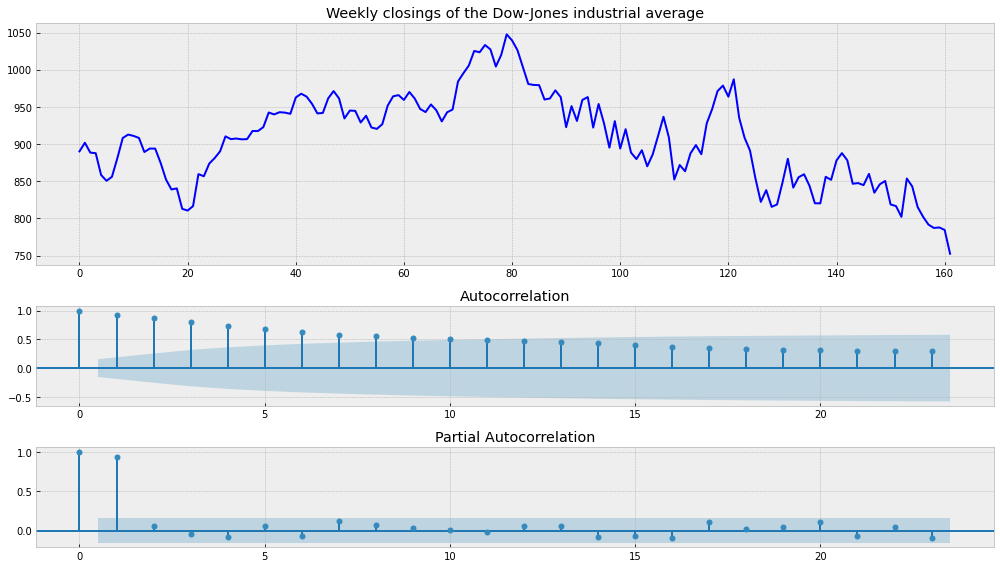

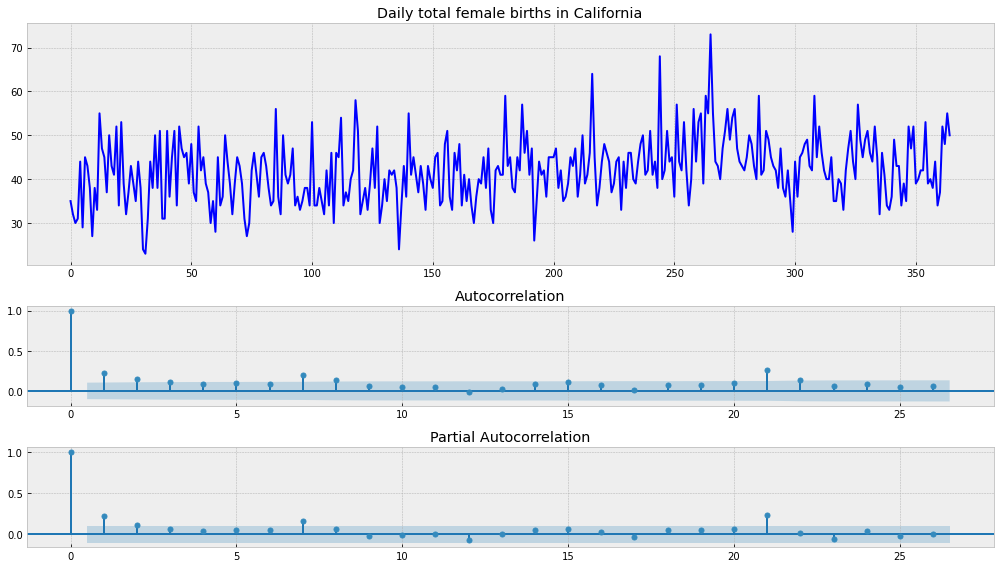

In [81]:
for key, values in all_series.items():
    print('{}\n'.format(key.upper()))
    tsplot(values, title=key)
    print('\n-----------------------------------------')

####  Tест Дики-Фуллера отвергает гипотизу о нестанционарности ряда у следующих данных
    MEAN MONTHLY AIR TEMPERATURE, DAILY TOTAL FEMALE BIRTHS IN CALIFORNIA

#### К оставшимся выборкам применим преобразование Бокса-Кокса для уменьшения дисперсии

In [105]:
series_4 = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]
}

MONTHLY SALES OF COMPANY X

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

-----------------------------------------
MONTHLY BOSTON ARMED ROBBERIES

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

-----------------------------------------
INTERNATIONAL AIRLINE PASSENGERS: MONTHLY TOTALS IN THOUSANDS

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#La

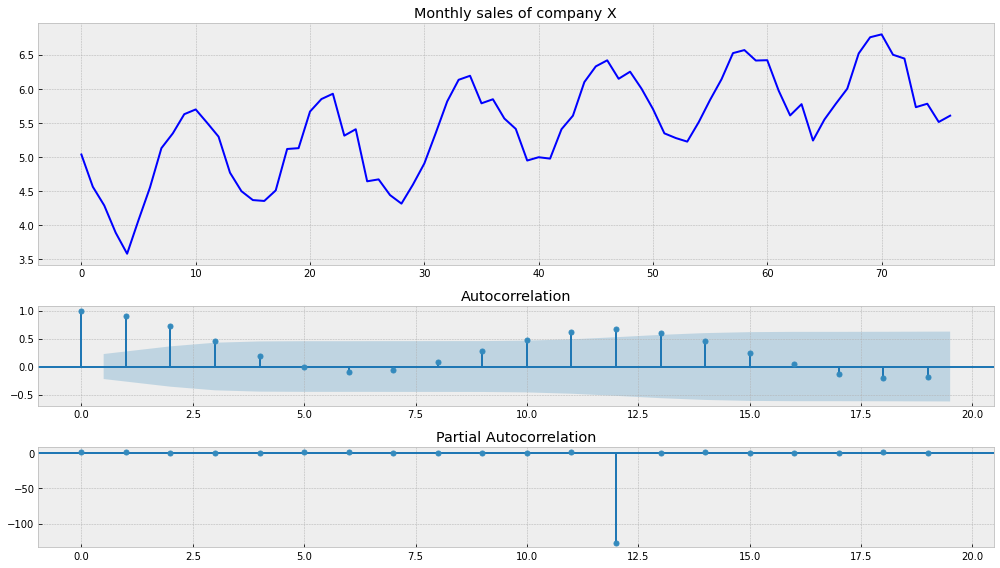

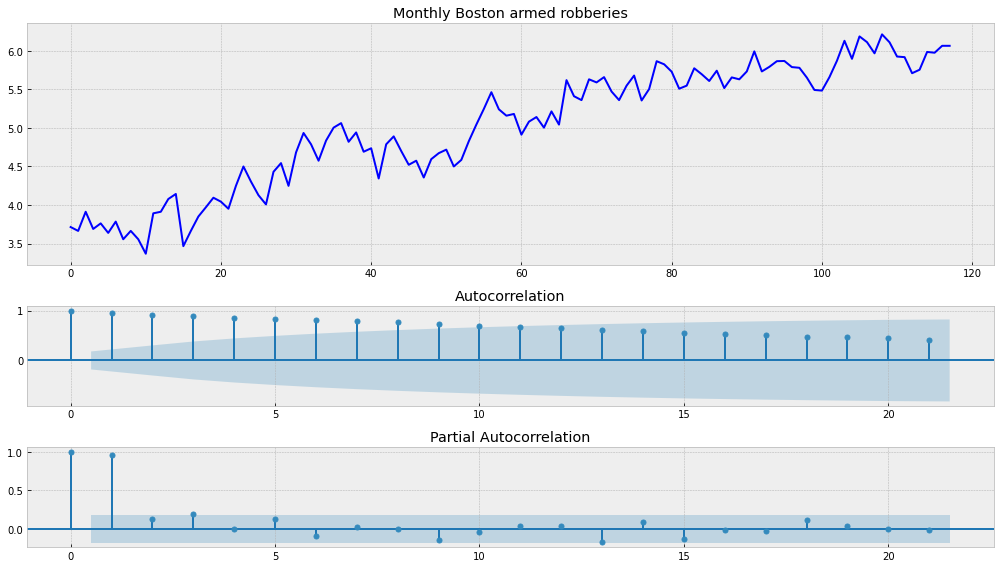

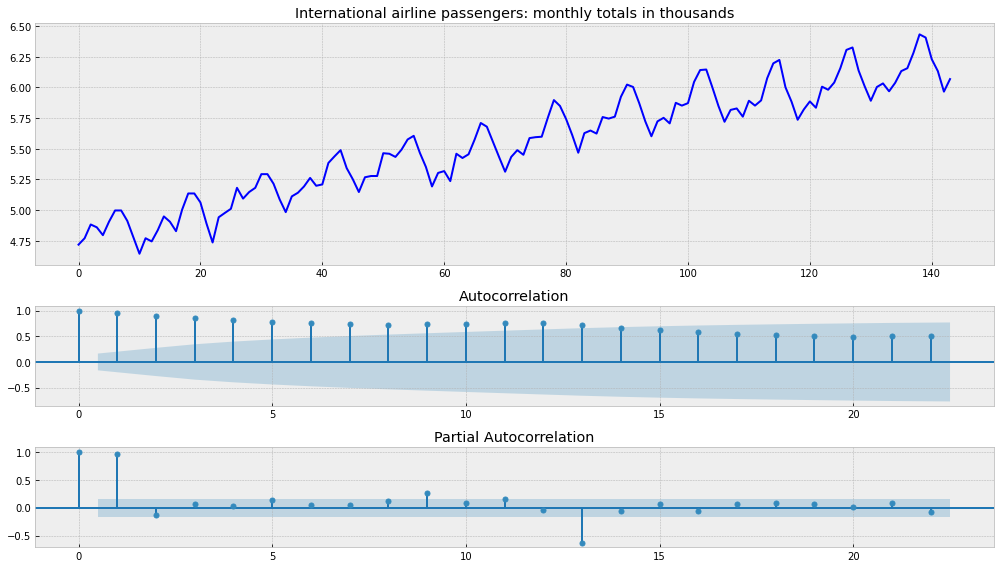

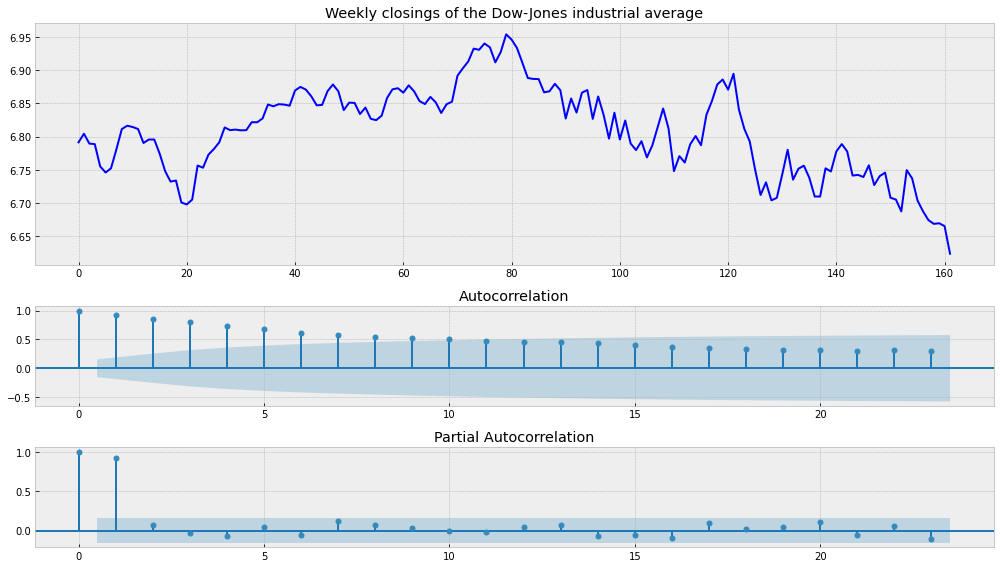

In [106]:
for key, values in series_4.items():
    series = boxcox(values, 0)
    print('{}\n'.format(key.upper()))
    tsplot(series, title=key)
    print('\n-----------------------------------------')

#### Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
    По графикам ряда видно наличие тренда. Уберем его дифференцированием.

MONTHLY SALES OF COMPANY X

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

-----------------------------------------
MONTHLY BOSTON ARMED ROBBERIES

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

-----------------------------------------
INTERNATIONAL AIRLINE PASSENGERS: MONTHLY TOTALS IN THOUSANDS

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                        

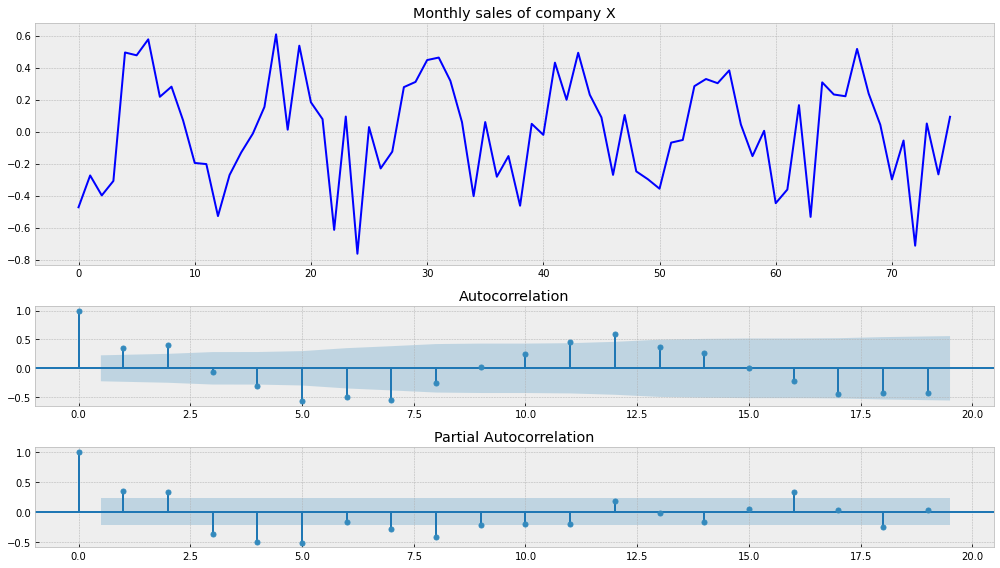

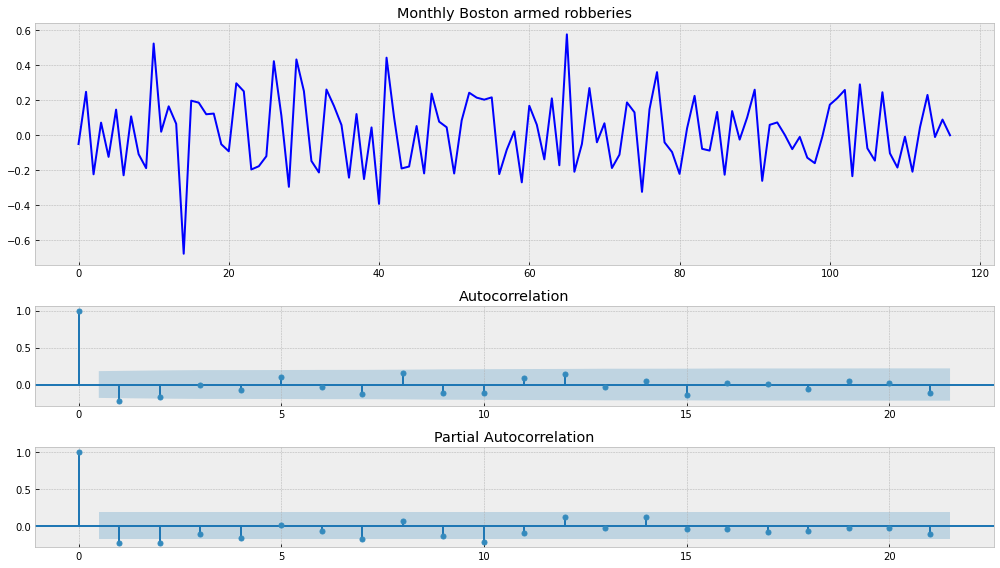

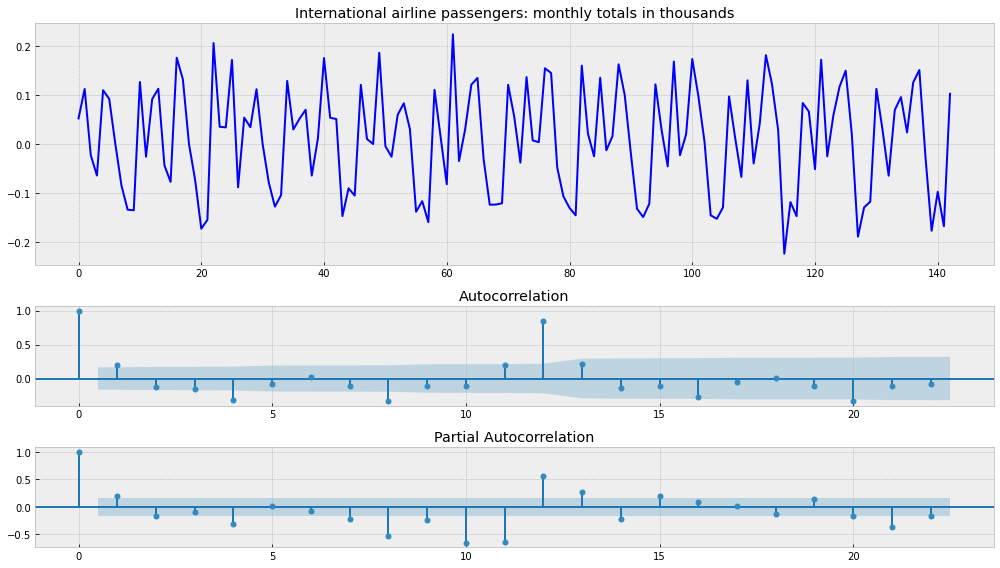

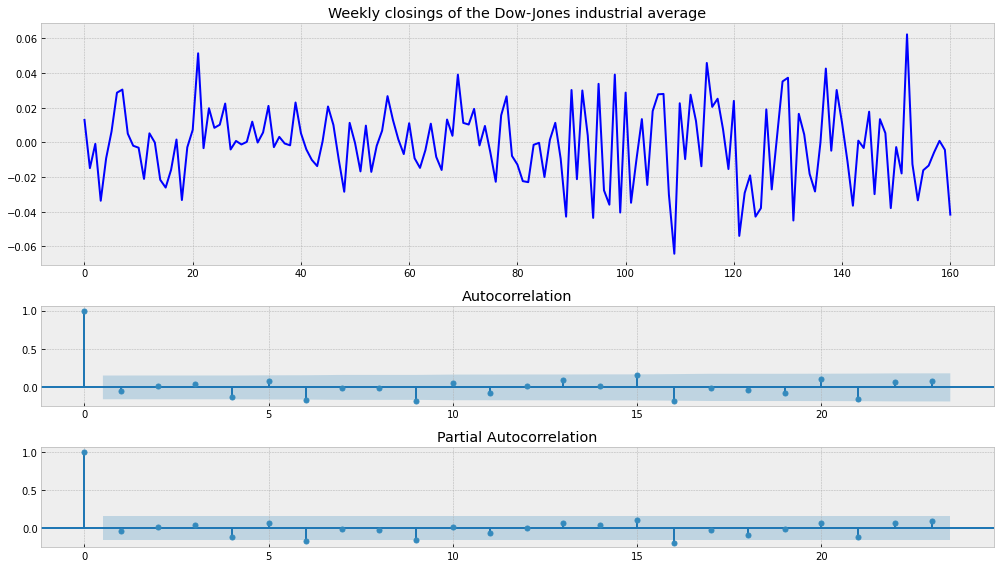

In [107]:
for key, values in series_4.items():
    series = boxcox(values, 0)
    series = series[1:] - series[:-1]
    print('{}\n'.format(key.upper()))
    tsplot(series, title=key)
    print('\n-----------------------------------------')

####  Tест Дики-Фуллера отвергает гипотизу о нестанционарности ряда у следующих данных
    WEEKLY CLOSINGS OF THE DOW-JONES INDUSTRIAL AVERAGE
    MONTHLY BOSTON ARMED ROBBERIES
    MONTHLY SALES OF COMPANY X

#### Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

Results of Dickey-Fuller Test:
Test Statistic                -1.051523e+01
p-value                        1.000402e-18
#Lags Used                     6.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


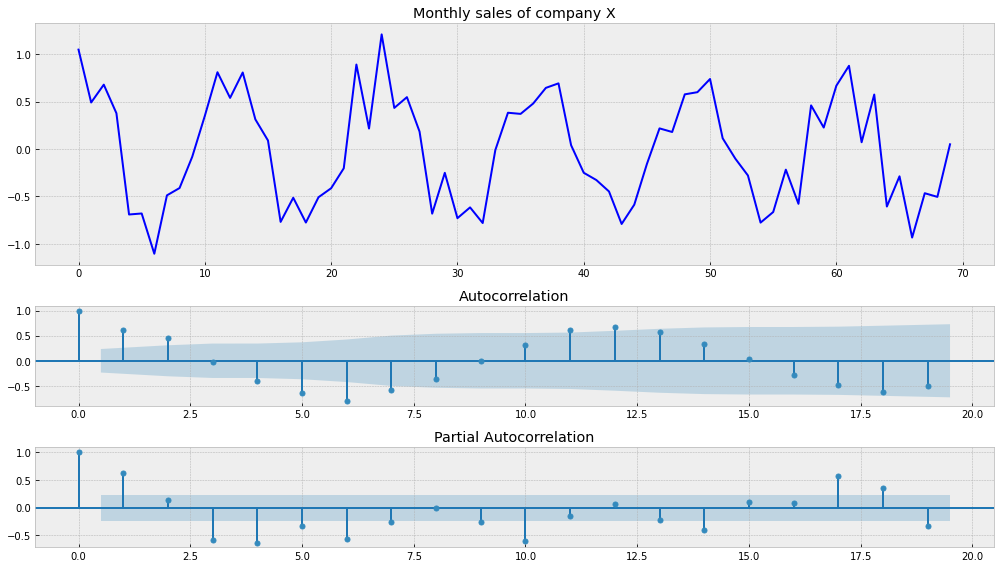

In [118]:
sales = boxcox(sales_of_company_x["Count"], 0)
sales = sales[1:] - sales[:-1]
sales = sales[6:] - sales[:-6]
tsplot(sales, title='Monthly sales of company X' )

Results of Dickey-Fuller Test:
Test Statistic                -1.531765e+01
p-value                        4.104887e-28
#Lags Used                     6.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


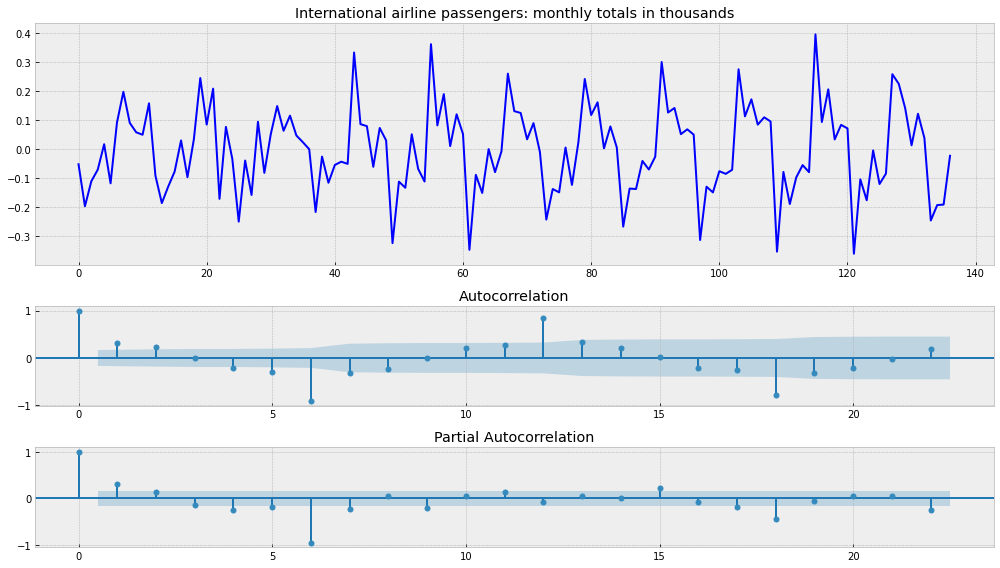

In [121]:
airlines = boxcox(airlines_passengers["Count"], 0)
airlines = airlines[1:] - airlines[:-1]
airlines = airlines[6:] - airlines[:-6]
tsplot(airlines, title='International airline passengers: monthly totals in thousands')

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!